<h2 style='color:blue' align="center">Decision Tree Classification</h2>

##### In this file using following columns build a model to predict if person would survive or not,

1. Pclass
1. Sex
1. Age
1. Fare

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [4]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [5]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [6]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [7]:
inputs.isnull().sum()

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [8]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [9]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [10]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [11]:
inputs.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [14]:
X_train

,Pclass,Sex,Age,Fare
676,3,1,24.5,8.0500
341,1,2,24.0,263.0000
427,2,2,19.0,26.0000
532,3,1,17.0,7.2292
733,2,1,23.0,13.0000
...,...,...,...,...
545,1,1,64.0,26.0000
83,1,1,28.0,47.1000
67,3,1,19.0,8.1583
478,3,1,22.0,7.5208


In [15]:
X_test

,Pclass,Sex,Age,Fare
317,2,1,54.000000,14.0000
177,1,2,50.000000,28.7125
470,3,1,29.699118,7.2500
644,3,2,0.750000,19.2583
703,3,1,25.000000,7.7417
...,...,...,...,...
165,3,1,9.000000,20.5250
512,1,1,36.000000,26.2875
556,1,2,48.000000,39.6000
262,1,1,52.000000,79.6500


In [16]:
y_test

317    0
177    0
470    0
644    1
703    0
      ..
165    1
512    1
556    1
262    0
439    0
Name: Survived, Length: 179, dtype: int64

In [17]:
len(X_train)

712

In [18]:
len(X_test)

179

In [20]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [21]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [22]:
model.score(X_test,y_test)

0.7374301675977654

In [23]:
y_predicted = model.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_predicted)
cm

array([[86, 25],
       [22, 46]], dtype=int64)

Text(69.0, 0.5, 'Truth')

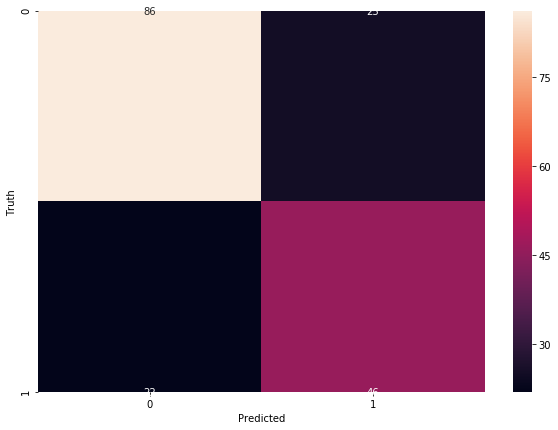

In [25]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
model.predict([[3,1,22.0,7.2500]])

array([0], dtype=int64)

**Exercise: Build decision tree model to predict salary based on certain parameters**

##### In this file using following columns build a model to predict if person would get salary more then 100k or not,
1. Company
2. Job
3. Degree

##### Calculate score of your model